In [ ]:
import json
import csv

# Placeholder for the input .ptp file name
ptp_file_name = 'power-profiler-1.ptp'  # Replace with your actual file name

# Placeholder for the output CSV file name
csv_file_name = 'output.csv'  # Replace with your desired output file name

# Function to convert .ptp (JSON) to CSV
def convert_ptp_to_csv(ptp_file, csv_file):
    with open(ptp_file, 'r') as file:
        # Load the JSON data from the .ptp file
        data = json.load(file)

    # Open the CSV file for writing
    with open(csv_file, 'w', newline='') as csvfile:
        # Define the CSV writer
        csv_writer = csv.writer(csvfile)

        # Write the header row using the field names from the first measurement
        headers = ['time_ns'] + [field['label'] for field in data['measurements'][0]['values'][0]['descriptor']['fields']]
        csv_writer.writerow(headers)

        # Write each measurement's data
        for measurement in data['measurements']:
            for value in measurement['values']:
                row = [value['time_ns']] + value['values']
                csv_writer.writerow(row)

# Run the conversion
convert_ptp_to_csv(ptp_file_name, csv_file_name)
print(f'Converted {ptp_file_name} to {csv_file_name} successfully.')


Converted power-profiler-1.ptp to output.csv successfully.


<Axes: xlabel='time_ns'>

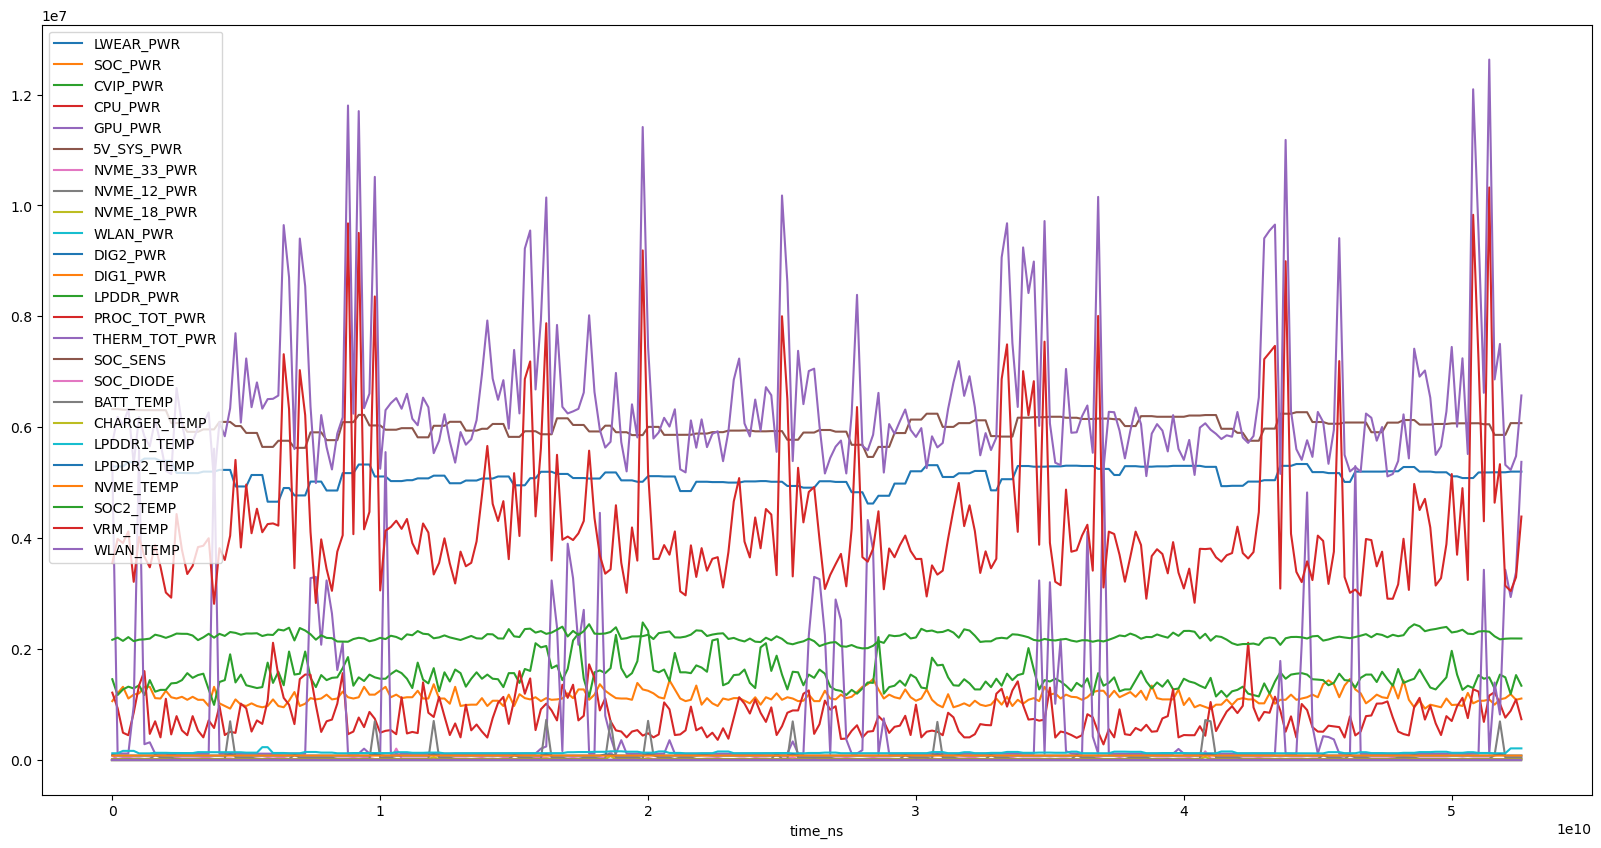

In [7]:
import pandas as pd

data = pd.read_csv('output.csv')
# convert index to time_ns
data = data.set_index('time_ns')

# plot the dataframe, adjusting the size of the plot as needed
data.plot(figsize=(20, 10))

<Axes: xlabel='time_ns'>

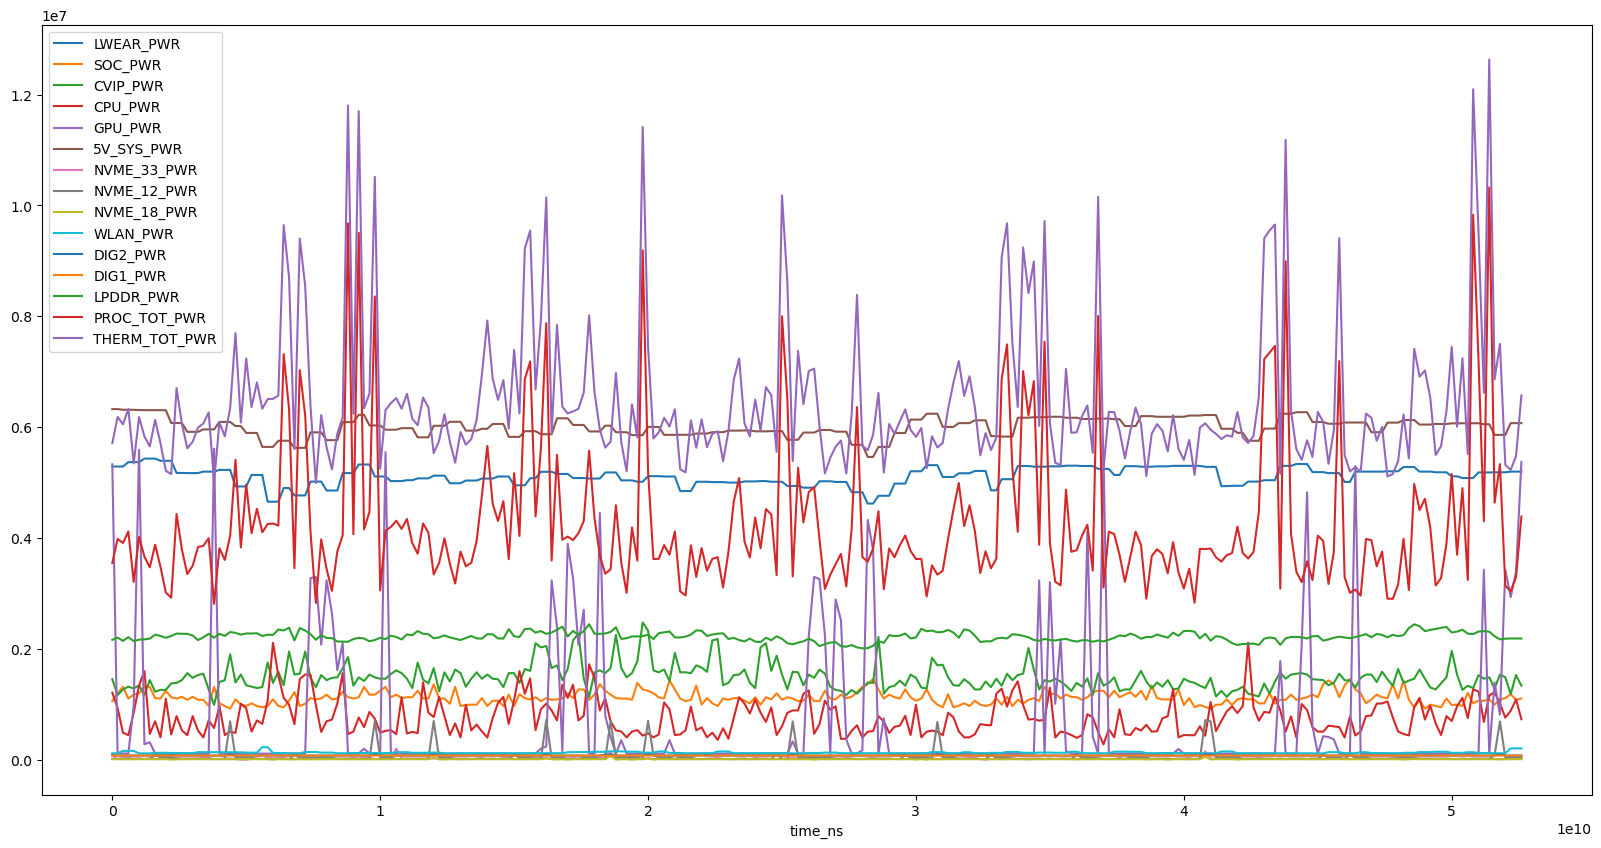

In [13]:
# plot just the columns with names that contain 'pwr'
data.filter(like='PWR').plot(figsize=(20, 10))

<Axes: xlabel='time_ns'>

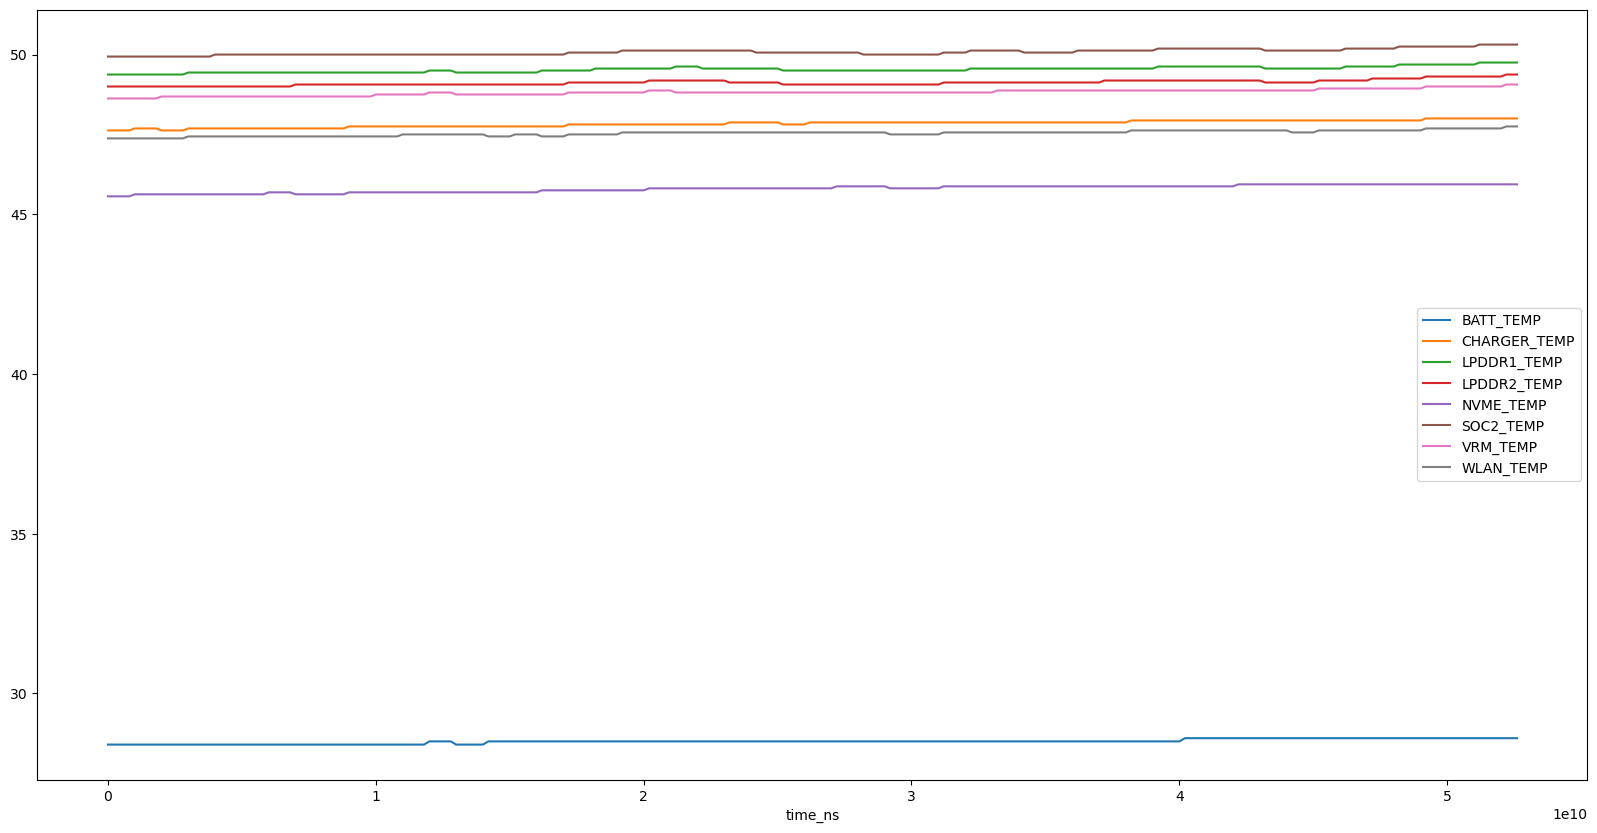

In [14]:
# plot just the columns with names that contain 'pwr'
data.filter(like='TEMP').plot(figsize=(20, 10))